<>:28: SyntaxWarning: invalid escape sequence '\g'
<>:28: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_11392\3369646413.py:28: SyntaxWarning: invalid escape sequence '\g'
  plt.title(f"Gamma $\gamma={g}$")


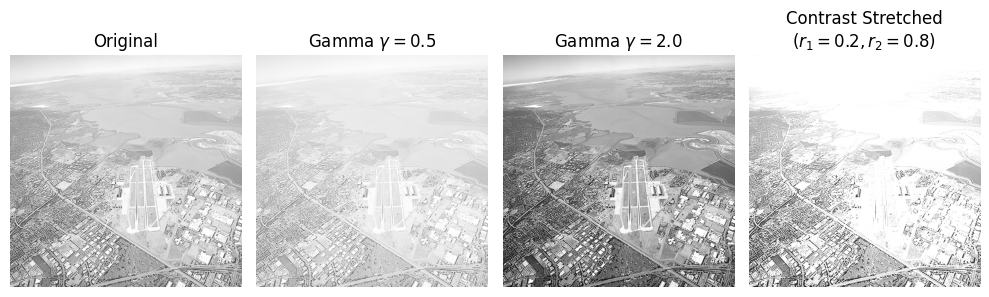

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

f = cv.imread('Images/runway.png', cv.IMREAD_GRAYSCALE)

assert f is not None

plt.figure(figsize=(10, 10))

plt.subplot(1, 4, 1)
plt.imshow(f, cmap='gray', vmin=0, vmax=255)
plt.title("Original")
plt.axis('off')

gamma_values = [0.5, 2.0]

for i, g in enumerate(gamma_values):
    table = np.array([((i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    h = cv.LUT(f, table)
    cv.imwrite(f'q1_gamma_{g}.png', h)
    
    plt.subplot(1, 4, i+2)
    plt.imshow(h, cmap='gray', vmin=0, vmax=255)
    plt.title(rf"Gamma $\gamma={g}$")
    plt.axis('off')


r1 = int(0.2 * 255)
r2 = int(0.8 * 255)

stretch_table = []

for i in range(256):
    if i < r1:
        val = 0
    elif i > r2:
        val = 255
    else:
        val = ((i - r1) / (r2 - r1)) * 255
    stretch_table.append(val)

stretch_table = np.array(stretch_table).astype('uint8')
contrast_img = cv.LUT(f, stretch_table)

cv.imwrite('q1_contrast_stretch.png', contrast_img)

plt.subplot(1, 4, 4)
plt.imshow(contrast_img, cmap='gray', vmin=0, vmax=255)
plt.title(rf"Contrast Stretched\n($r_1=0.2, r_2=0.8$)")
plt.axis('off')

plt.tight_layout()
plt.show()